## Importing libraries 

In [1]:
from xgboost import XGBClassifier

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *
#from IPython.core.display import display, HTML

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

# Getting the Dataset using Kaggle API

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/adult-census-income/adult.csv


In [5]:
data_kaggle = pd.read_csv("../input/adult-census-income/adult.csv")
data_kaggle.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
#Total rows, column
data_kaggle.shape

(32561, 15)

#### Total rows are 32561, while columns or variables or fields are 14, plus categorical 1 target class field 

# Exploratory Data Analysis and Feature Engineering

#### Displaying datatypes and number of non-mising rows in every variable. Results show that there are no missing values in the dataset. 

In [7]:
#Displaying datatypes and number of non-missing value for each column 
data_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Dropping the duplicate Rows

print("shape with duplicate rows: ",data_kaggle.shape)
data_kaggle = data_kaggle.drop_duplicates(keep = 'first')
print("shape without duplicate rows: ",data_kaggle.shape)

shape with duplicate rows:  (32561, 15)
shape without duplicate rows:  (32537, 15)


#### This is a summary statisics for numerical columns. Now lets identify various levels in the remaining categorical columns.

In [9]:
data_kaggle.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### This block shows that Native.country, workclass, and occupation have literal value '?' inside them

In [10]:
#Displaying names of all columns
print(data_kaggle.columns)
#Displaying levels in all categorical columns
print("workclass :",data_kaggle.workclass.unique())
print("education :",data_kaggle.education.unique())
print("marital status :",data_kaggle['marital.status'].unique())
print("occupation :",data_kaggle.occupation.unique())
print("relationship :",data_kaggle.relationship.unique())
print("race :",data_kaggle.race.unique())
print("sex :",data_kaggle.sex.unique())
print("native country :",data_kaggle['native.country'].unique())


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
workclass : ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education : ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital status : ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation : ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship : ['Not-in-family' 'Unmarried' 'Ow

#### Exploring target variable 

In [11]:
#Displaying target field and distribution for two classes
print(data_kaggle.income.unique())
print(data_kaggle.income.value_counts())

['<=50K' '>50K']
<=50K    24698
>50K      7839
Name: income, dtype: int64


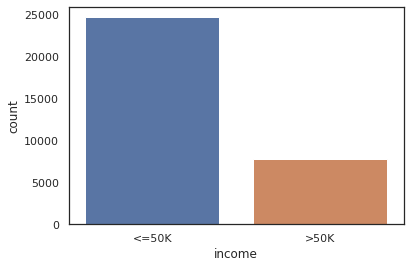

In [12]:
# Count of >50K & <=50K
sns.countplot(data_kaggle['income'],label="Count")
#sns.plt.show()

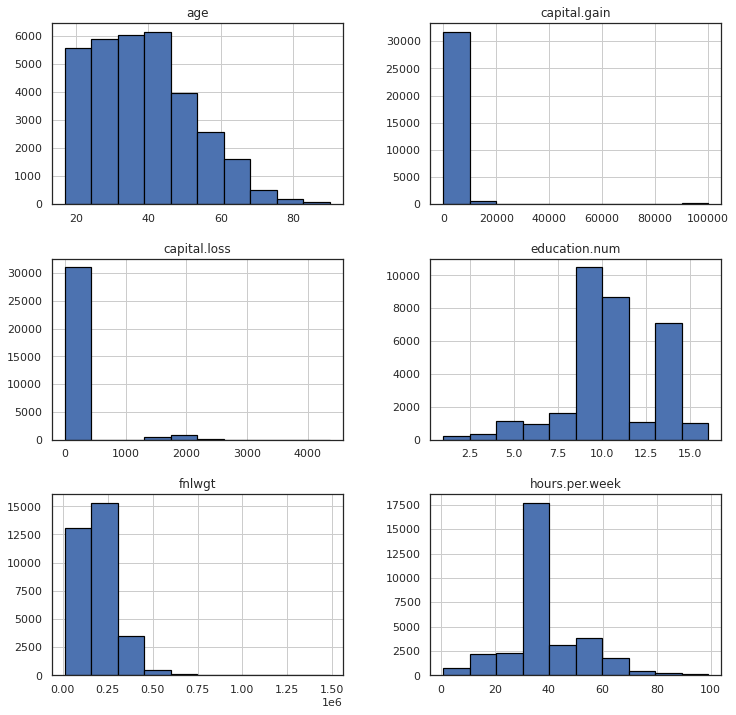

In [13]:
# Histogram Distribution of all numeric fields of the Dataset
distribution = data_kaggle.hist(edgecolor = 'black', linewidth = 1.2, color = 'b')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

#### Few insights from above graphs -
* Capital gain and Capital Loss have maximum entries as 0. I will be combining the two fields later on as part of my feature engineering work.
* Hours per week has maximum entries (almost half) as 40 hours. This will help in analysisng later on whwther this field can be converted into a categorical field and how it can be done.
* Education number has most entries for 9, 10 and 13 levels. This column can be explored for conversion to lesser categories during the analysis.
* Also note that, fnlwgt is weight of an observation.

Please note that this above piece of EDA code of plotting histograms, is from kernel - https://www.kaggle.com/sumitm004/eda-and-income-predictions-86-75-accuracy. The analysis is all mine and I have included this kernel in my research too, pleease refer my report for details. 

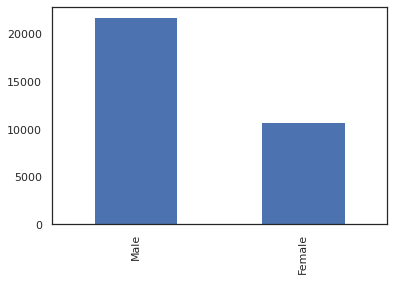

In [14]:
#Plotting levels in all categorical columns
data_kaggle.sex.value_counts().head(10).plot.bar()

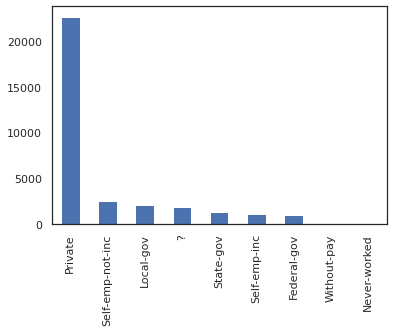

In [15]:
data_kaggle.workclass.value_counts().plot.bar()

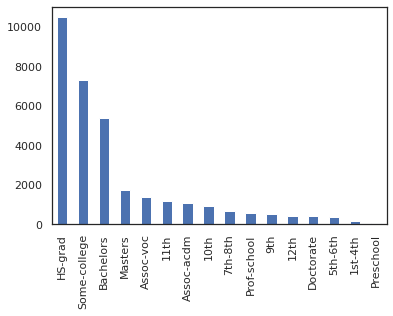

In [16]:
data_kaggle.education.value_counts().plot.bar()

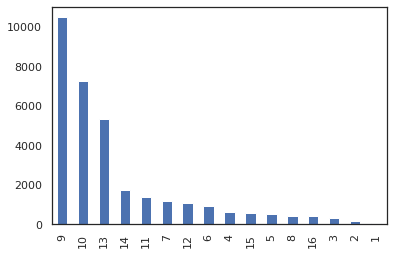

In [17]:
data_kaggle['education.num'].value_counts().plot.bar()

#### Some insights:
* Educatin and education.num stands for same dimension.
* education.num is not the years spent in education but is an ordinal ranking to corresponding education level

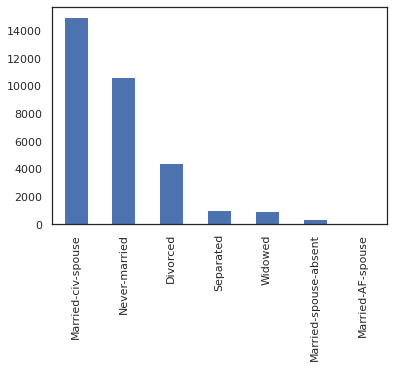

In [18]:
data_kaggle['marital.status'].value_counts().plot.bar()

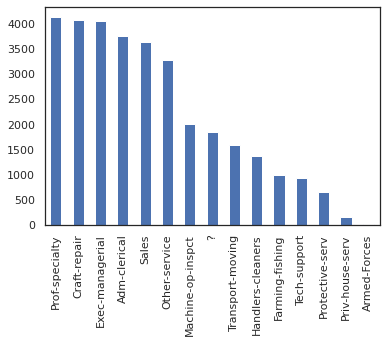

In [19]:
data_kaggle.occupation.value_counts().plot.bar()

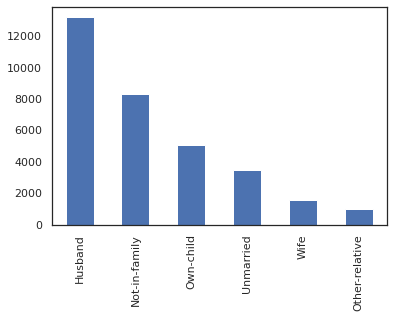

In [20]:
data_kaggle.relationship.value_counts().plot.bar()

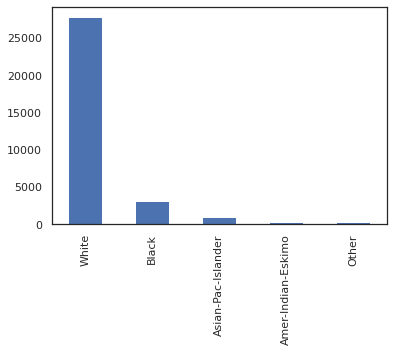

In [21]:
data_kaggle.race.value_counts().plot.bar()

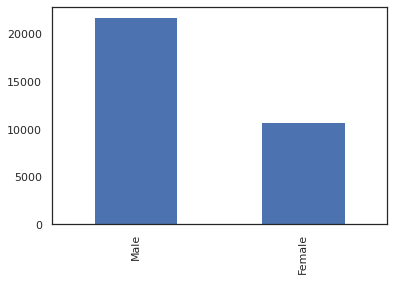

In [22]:
data_kaggle.sex.value_counts().plot.bar()

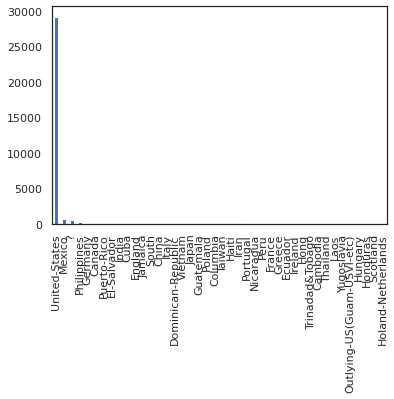

In [23]:
data_kaggle['native.country'].value_counts().plot.bar()

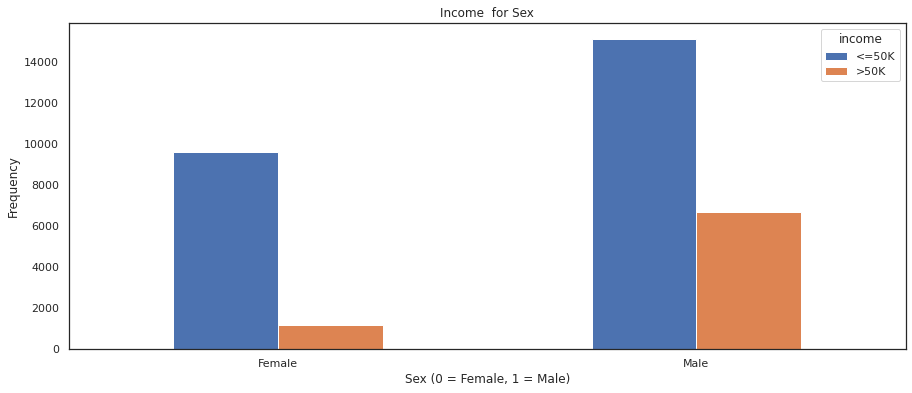

In [24]:
#Plotting Sex along with the target field income. This has shown that most of the females are earning lesser than 50000 dollars
#Thus Sex can be a good predictor of target class.
pd.crosstab(data_kaggle['sex'],data_kaggle['income']).plot(kind="bar",figsize=(15,6) )
plt.title('Income  for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


This EDA code for exploring sex and income together, is taken from a kernel which can be found here - https://www.kaggle.com/lodetomasi1995/income-classification-eda-azure-dataset. 


#### Few insights from plotting categorical variables
* Very high majority has their 'Native Country' as USA. I can recode this variable as 0 and 1, keeping 1 for USa and 0 for rest of the countries or vice-versa
* Similarly, Race can be recoded with 'white' as 1 and others as 0.
* In workclass variable, '?' is 4th most occurring value, and in occupation its 8th most occuring. 


In [25]:
#Getting count of '?' in occupation
count_occu = data_kaggle[data_kaggle.occupation == '?'].occupation.count()
print(count_occu)
#Getting count of '?' in workclass
count_work = data_kaggle[data_kaggle.workclass == '?'].workclass.count()
print(count_work)

1843
1836


In [26]:
#Getting count of '?' in occupation
data_kaggle[data_kaggle.occupation == '?'].workclass.value_counts()


?               1836
Never-worked       7
Name: workclass, dtype: int64

In [27]:
#Getting count of '?' in occupation
data_kaggle[data_kaggle.workclass == '?'].occupation.value_counts()


?    1836
Name: occupation, dtype: int64

#### Some insights :
* When value for occupation is '?' , workclass is either '?' or 'Never worked'. And when value for workclass is '?' , occuptaion is  '?' too. 
* 1800 rows is a huge numuber, hence discarding the rows will not be a right decision. Instead, i will recode '?' with Not working' or 'Unemployed' in both the variables. It can be any other literal value too, but since both variables have '?' for same rows and general intuition says that status can be as unemploed too so going forward with this substitution.


In [28]:
# This will replace "?" with "unemployed" 
data_kaggle.replace(to_replace ="?", 
                 value ="unemployed", inplace=True)

Native country had '?' values too and now it is replaced with 'unempployed', which doesnt make sense. So changing the values, assigining a new category as 'unknown' for all '?' values. I am not dropping these values unlike how the kernels i have reviewed have done, as 583 rows is a significant number of rows.


In [29]:
data_kaggle[data_kaggle['native.country'] == 'unemployed'].shape

(582, 15)

In [30]:
# This will replace "?" with "unemployed" 
data_kaggle['native.country'].replace(to_replace ="unemployed", 
                 value ="unknown", inplace=True)

Now coming over to Capital gain and Capital loss variables -
* Capital gain has more than 29k rows as 0
* capital loss has 31k rows as 0
* These two variables are in fact linked, as general intuition also indicates.
* When Capital gain is 0 capital loss is either 0 or has a value, and when capital gain has a value, capital loss is always 0
* When capital loss is 0, capital gain is either 0 or has a value, and when capital loss has a value, capital gain always has a value
* This indicates and also as general intuition suggests - There can either be Nocapital gain and no capital loss (both are 0) , or there can be only a capital gain (when loss is 0 and gain has some value), or there can be only a capital loss at a time (when loss has a value, while gain is 0)

* Thus, reengineering both columns as a single column or merging them together here. 

In [31]:
print(data_kaggle[data_kaggle['capital.gain']==0].shape)
print(data_kaggle[data_kaggle['capital.loss']==0].shape)

(29825, 15)
(31018, 15)


In [32]:
data_kaggle[data_kaggle['capital.gain']==0].filter(['capital.gain','capital.loss'])

,capital.gain,capital.loss
0,0,4356
1,0,4356
2,0,4356
3,0,3900
4,0,3900
...,...,...
32556,0,0
32557,0,0
32558,0,0
32559,0,0


In [33]:
data_kaggle[data_kaggle['capital.gain']==0]['capital.loss'].value_counts()

0       28306
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital.loss, Length: 92, dtype: int64

In [34]:
data_kaggle[data_kaggle['capital.loss']==0]['capital.gain'].value_counts()

0        28306
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital.gain, Length: 119, dtype: int64

In [35]:
#Majority values are 0 for both gain and loss
data_kaggle[(data_kaggle['capital.gain']==0) & (data_kaggle['capital.loss'] == 0)].shape

(28306, 15)

In [36]:
#Merging two columns - such that a negative value means capital loss and positive value means capital gain
data_kaggle['capital.flow'] =  data_kaggle['capital.gain'] - data_kaggle['capital.loss']

In [37]:
data_kaggle['capital.flow'].value_counts()

 0        28306
 15024      347
 7688       284
 7298       246
-1902       202
          ...  
 22040        1
 2538         1
-2467         1
-2163         1
-2080         1
Name: capital.flow, Length: 210, dtype: int64

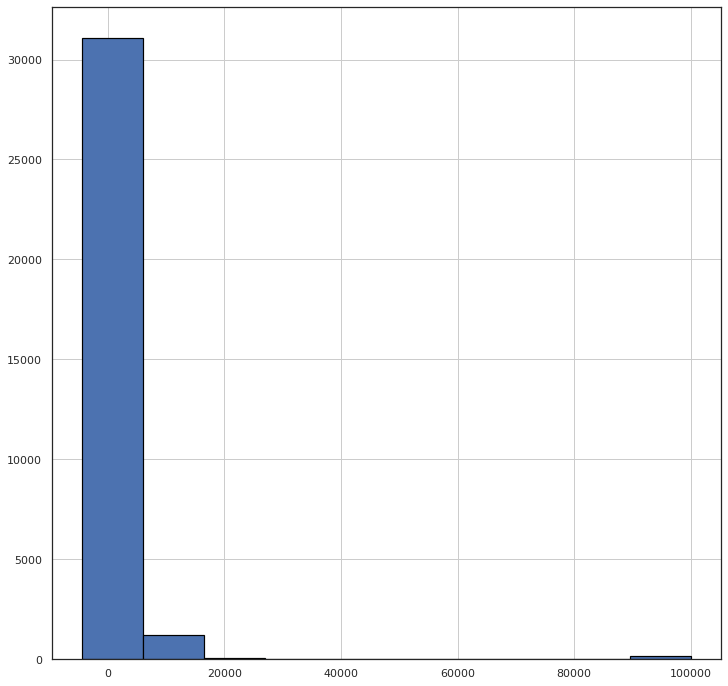

In [38]:
# Histogram Distribution of newly created capital.flow of the Dataset
distribution = data_kaggle['capital.flow'].hist(edgecolor = 'black', linewidth = 1.2, color = 'b')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

#### Checking for Correlation and multicollinearity - 
* When variables are highly correlated, performance of classifiers can decrease. This problem is known as multicollinearity and solution is removing one of the correlated variables between the two.
* Using Pearson's correlation we can test for correlation between numeric fields

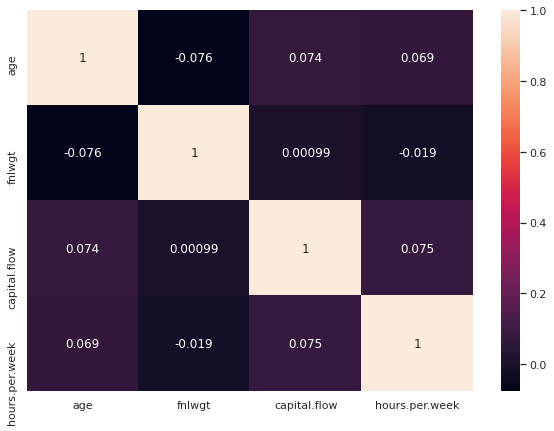

In [39]:
 #This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(data_kaggle.filter(['age','fnlwgt','capital.flow','hours.per.week']).corr(), annot = True);

#### Observation:
* The numberic variables are not highly or even moderateely correlated 
* It is safe to include the variables in building a model without worrying about multicollinearity


### Selecting Features:
1. Using SelectKBest method from scikit
    + ANOVA for numerical input variables
    + Chi-square for categorical inputs
2. Using Recursive Feature Elimiation or RFE 

In [40]:
data_kaggle.columns
data_kaggle.values

array([[90, 'unemployed', 77053, ..., 'United-States', '<=50K', -4356],
       [82, 'Private', 132870, ..., 'United-States', '<=50K', -4356],
       [66, 'unemployed', 186061, ..., 'United-States', '<=50K', -4356],
       ...,
       [40, 'Private', 154374, ..., 'United-States', '>50K', 0],
       [58, 'Private', 151910, ..., 'United-States', '<=50K', 0],
       [22, 'Private', 201490, ..., 'United-States', '<=50K', 0]],
      dtype=object)

In [41]:
# Feature Selection with Univariate Statistical Tests - for Numeric inputs
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
names = ['age','fnlwgt','capital.flow','hours.per.week']
X= data_kaggle[names]
Y= data_kaggle['income']
# Performing feature extraction using ANOVA method
test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(X, Y)
# summarize scores
feature_list_num = fit.scores_
print(fit.scores_)

[1885.31644122    2.93800147 1568.16796509 1811.53386553]


#### Observations :
* This shows that most relevant features are those with highest scores.
* fnlwgt is has very low relevance score, and it is understood too. The data description on Kaggle also suggests that this field is just the weight of an observation calculated on the bigger dataset collected from all USA states. I will thus be discarding the field in all my model building atttempts. I have seen this happening in some of the kernels I researched too, however the author did not statistically determined the significance or the reason of discarding the field fnlwgt.  
* I will be using age, capital.flow and hours.per.week in my models.
* K value is meant for telling the algortithm how many variables i want to select finally while tranforming the data. In our case since I am only using it to understand the relative importance of features and not transforming the data, it doesn't matter what value i piut in for k (k=2,k=3,k=1 will all give same outputs here)
* Also, I will be doing this analysis as a sub-loop while performing k-fold cross validation. The reason for doing this is that , firstly, it is a stochastic approach and hence for more robust conclusion we need multiple runs to understand the actual behaviour. Secondly, while i will be doing k-fold validation, the folds or train datasets will be different every time and hence the features might behave differently for different vallues. 

In [42]:
#Label Encoder - Encoding or feature engineering for categorical (non-ordinal) variables
from sklearn.preprocessing import LabelEncoder
#Creating a copy of my dataframe
data_kaggle_cat = data_kaggle
categorical_features = ['workclass','marital.status','occupation','relationship','race','sex','native.country']

label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    data_kaggle_cat[feature] = label_encoder_feat[feature].fit_transform(data_kaggle_cat[feature])

data_kaggle_cat.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital.flow
0,90,8,77053,HS-grad,9,6,14,1,4,0,0,4356,40,38,<=50K,-4356
1,82,3,132870,HS-grad,9,6,3,1,4,0,0,4356,18,38,<=50K,-4356
2,66,8,186061,Some-college,10,6,14,4,2,0,0,4356,40,38,<=50K,-4356
3,54,3,140359,7th-8th,4,0,6,4,4,0,0,3900,40,38,<=50K,-3900
4,41,3,264663,Some-college,10,5,9,3,4,0,0,3900,40,38,<=50K,-3900


Above codelines of using a Label Encoder is inspired from a kernel I reviewed. It can be found here - https://www.kaggle.com/sumitm004/eda-and-income-predictions-86-75-accuracy

In [43]:
# Feature Selection with Univariate Statistical Tests - for Categorical inputs
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# load data
names = ['workclass','education.num','marital.status','occupation','relationship','race','sex','native.country']
#names = ['education.num','marital.status','relationship','race','sex','native.country']

X= data_kaggle_cat[names]
Y= data_kaggle_cat['income']
# Performing feature extraction using Chi-square method
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, Y)
# summarize scores
feature_list_cat = fit.scores_
print(fit.scores_)

[  73.48092241 2399.03589042 1121.72183108   10.81844393 3658.21506028
   33.01217587  501.96853469   17.38376727]


#### Observations:
* Highest scores are for - relationship, eduction.num, marital.status, and sex.
* For workclas, occupation, native.country, and race the chi-square scores are very low and hence these variables can be discarded while building up the model.

### Few more observations about Encoding techniques used in this report -
* When we do Label encoding, we inadvertently introduce ordinality in the categorical variables
* This is fine as long as we are trying to finalise best variable using univariate approaches like chi-square, as performed above
* One solution is using one hot encoding, which creates (n-1) fields with binary 0/1 values, where n is the number of levels available in the categorical field 
* When i have to actually use these categorical variables inside my model, i will be using both - label encoding and one hot encoding approach to decide the best performing model among them. 

In [44]:
data_kaggle.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'capital.flow'],
      dtype='object')

In [45]:
data_kaggle.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital.flow
0,90,8,77053,HS-grad,9,6,14,1,4,0,0,4356,40,38,<=50K,-4356
1,82,3,132870,HS-grad,9,6,3,1,4,0,0,4356,18,38,<=50K,-4356
2,66,8,186061,Some-college,10,6,14,4,2,0,0,4356,40,38,<=50K,-4356
3,54,3,140359,7th-8th,4,0,6,4,4,0,0,3900,40,38,<=50K,-3900
4,41,3,264663,Some-college,10,5,9,3,4,0,0,3900,40,38,<=50K,-3900


In [46]:
#Encoding Target variable as 0 or 1 
#Changing Positive to 1 and Negative to 0 for ease of processing
data_kaggle.loc[data_kaggle["income"] == "<=50K", "income"] = 1
data_kaggle.loc[data_kaggle["income"] == ">50K", "income"] = 0
data_kaggle.head(5)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital.flow
0,90,8,77053,HS-grad,9,6,14,1,4,0,0,4356,40,38,1,-4356
1,82,3,132870,HS-grad,9,6,3,1,4,0,0,4356,18,38,1,-4356
2,66,8,186061,Some-college,10,6,14,4,2,0,0,4356,40,38,1,-4356
3,54,3,140359,7th-8th,4,0,6,4,4,0,0,3900,40,38,1,-3900
4,41,3,264663,Some-college,10,5,9,3,4,0,0,3900,40,38,1,-3900


In [47]:
data_kaggle.income.value_counts()
# 1 signifies income is less than equal to 50,000 $
# 0 signifies income is more than 50,000 $

1    24698
0     7839
Name: income, dtype: int64

In [48]:
#Creating the final dataset after all feature engineering
feature_list = ['age','capital.flow','hours.per.week', 'relationship', 'education.num', 'marital.status','sex','income']
data_kaggle_feature1 = data_kaggle[feature_list]
data_kaggle_feature1.head(5)

,age,capital.flow,hours.per.week,relationship,education.num,marital.status,sex,income
0,90,-4356,40,1,9,6,0,1
1,82,-4356,18,1,9,6,0,1
2,66,-4356,40,4,10,6,0,1
3,54,-3900,40,4,4,0,0,1
4,41,-3900,40,3,10,5,0,1


# Model Building
### K-fold cross vaildation
It gives us a less biased results than a simple train-test splitting.

In [49]:
data_kaggle_feature1.income =data_kaggle_feature1.income.astype('int')

In [50]:
#Label Encoder - Encoding or feature engineering for categorical (non-ordinal) variables
from sklearn.preprocessing import LabelEncoder
#Creating a copy of my dataframe
#data_kaggle_cat = data_kaggle
categorical_features = ['marital.status','relationship','sex']

label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    data_kaggle_feature1[feature] = label_encoder_feat[feature].fit_transform(data_kaggle_feature1[feature])

data_kaggle_feature1.head()

,age,capital.flow,hours.per.week,relationship,education.num,marital.status,sex,income
0,90,-4356,40,1,9,6,0,1
1,82,-4356,18,1,9,6,0,1
2,66,-4356,40,4,10,6,0,1
3,54,-3900,40,4,4,0,0,1
4,41,-3900,40,3,10,5,0,1


In [51]:
#Creating Training(25,000)+Validation(15,000) and Test(10,000) sttartefied dataset - a split of 50-30-20% respectively
#First splitting dataset of 50,000 instances into training (80%) and test (20%)
from sklearn.model_selection import train_test_split
X_training, X_test, Y_training, Y_test = train_test_split(data_kaggle_feature1.iloc[:,0:-1], data_kaggle_feature1.income,
                                                    stratify=data_kaggle_feature1.income, 
                                                    test_size=0.10)



print("Shape of train split :",X_training.shape,Y_training.shape)
print("Shape of test split :",X_test.shape,Y_test.shape)

Shape of train split : (29283, 7) (29283,)
Shape of test split : (3254, 7) (3254,)


### **Using Logistic Regression**

In [52]:
# scikit-learn k-fold cross-validation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from itertools import compress
from numpy import array
from sklearn.model_selection import KFold, StratifiedKFold
from statistics import mode
from operator import itemgetter 
from sklearn.ensemble import GradientBoostingClassifier



# Prepare for 10-fold cross validation
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_training, Y_training)
accu_kfold_list = []
counter_kfold =0
# enumerate splits
for train, val in skf.split(X_training, Y_training):
    counter_kfold+=1
    #print("KFold validation iteration :",counter_kfold)
    X_train, X_val = X_training.iloc[train], X_training.iloc[val]
    Y_train, Y_val = Y_training.iloc[train], Y_training.iloc[val]


    # create a base classifier used to evaluate a subset of attributes
    accu_list = []
    for num_of_vars in range(1,len(data_kaggle_feature1.columns)):
        
        #Logistic Regression
        logreg = LogisticRegression()
        # create the RFE model and select 3 attributes
        rfe = RFE(logreg, num_of_vars)
        rfe = rfe.fit(X_train, Y_train)

        # summarize the selection of the attributes
        #print("Number of variables used :",num_of_vars)
        col_list = data_kaggle_feature1.columns.to_list()[:-1]
        #print(col_list)
        col_bool = rfe.support_
        #print(col_bool)
        col_list = list(compress(col_list, col_bool))  
        #print("Variables used in building this classifier :",col_list)

        # fit
        logreg.fit(X_train.filter(col_list), Y_train)

        # predict
        Y_pred = logreg.predict(X_val.filter(col_list))

        accuracy = accuracy_score(Y_val, Y_pred)
        #print('LogReg %s' % accuracy)

        #Adding the accuracy to list
        accu_list.append(accuracy)

    #print(accu_list)
    accu_kfold_list.append(accu_list)


#List of all accuracies
#print(accu_kfold_list)

#Creating empty lists to calculate which variable configuration produced maximum acccuracy
lst_rfe = []
lst_acu = []
for lst in accu_kfold_list:
    print("Index or number of variables used to build a model:",lst.index(max(lst))+1, "Max accuracy value :",max(lst) )
    lst_rfe.append(lst.index(max(lst))+1)
    lst_acu.append(max(lst))
    
print("List of 10 accuracies :",lst_acu)
print("List of indices or number of variables used :" ,lst_rfe)  
mode_val = max(set(lst_rfe), key=lst_rfe.count)
print("The Final number of variables that i am using to build and report best model :",mode_val)
indices = [i for i, x in enumerate(lst_rfe) if x == mode_val]
print("The indices of most occuring k value :",indices)

# using operator.itemgetter() to get elements from list  
res_list = list(itemgetter(*indices)(lst_acu))
print("The accuracy values present at these indices :",res_list)
print("The Final mean cross validation accuracy for reporting purpose is :",mean(res_list))
#print("The number of variables used in the best model :",mode(lst_avg))

Index or number of variables used to build a model: 4 Max accuracy value : 0.803004438374872
Index or number of variables used to build a model: 3 Max accuracy value : 0.8118811881188119
Index or number of variables used to build a model: 3 Max accuracy value : 0.8098327074086719
Index or number of variables used to build a model: 6 Max accuracy value : 0.8060109289617486
Index or number of variables used to build a model: 7 Max accuracy value : 0.8131830601092896
Index or number of variables used to build a model: 4 Max accuracy value : 0.8025956284153005
Index or number of variables used to build a model: 4 Max accuracy value : 0.8101092896174863
Index or number of variables used to build a model: 3 Max accuracy value : 0.8094262295081968
Index or number of variables used to build a model: 4 Max accuracy value : 0.8210382513661202
Index or number of variables used to build a model: 5 Max accuracy value : 0.8084016393442623
List of 10 accuracies : [0.803004438374872, 0.811881188118811

### Observations from and explanation for the above step:
* I am running an **inner loop** for running the RFE for 1 to maximum number of columns
* This will help me in identifying the columns which together produce the best estimate (or accuracies)
* The **outer loop** is to provide 10-fold cross validation.
* Idea is that for every fold the RFE should run, because every fold gives a different set of observations and hence RFE results could certainly differ. This is evident from the above analysis, as in some fold 3 columns gave best results while in some folds 7 columns gave best reults. 
* This approach will minimize the bias.
* Also, since i am using K-fold cross validation, I am going to get a distribution of accuracy values at the end and thus i can easily compare the performances of two models to determine which one is better. 

### Using Gradient Boosting Algorithm or GBC 

In [53]:
# scikit-learn k-fold cross-validation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from itertools import compress
from numpy import array
from sklearn.model_selection import KFold, StratifiedKFold
from statistics import mode
from operator import itemgetter 
from sklearn.ensemble import GradientBoostingClassifier


# Prepare for 10-fold cross validation
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_training, Y_training)
accu_kfold_list = []
counter_kfold =0
# enumerate splits
for train, val in skf.split(X_training, Y_training):
    counter_kfold+=1
    #print("KFold validation iteration :",counter_kfold)
    X_train, X_val = X_training.iloc[train], X_training.iloc[val]
    Y_train, Y_val = Y_training.iloc[train], Y_training.iloc[val]


    # create a base classifier used to evaluate a subset of attributes
    accu_list = []
    for num_of_vars in range(1,len(data_kaggle_feature1.columns)):
        
        # Gradient Boosting Algorithm - fit
        gbc = GradientBoostingClassifier()

        # create the RFE model and select 3 attributes
        rfe = RFE(gbc, num_of_vars)
        rfe = rfe.fit(X_train, Y_train)

        
        # summarize the selection of the attributes
        #print("Number of variables used :",num_of_vars)
        col_list = data_kaggle_feature1.columns.to_list()[:-1]
        #print(col_list)
        col_bool = rfe.support_
        #print(col_bool)
        col_list = list(compress(col_list, col_bool))  
        #print("Variables used in building this classifier :",col_list)

        # fit
        #logreg.fit(X_train.filter(col_list), Y_train)
        gbc.fit(X_train.filter(col_list), Y_train)
        accuracy = gbc.score(X_val.filter(col_list), Y_val)
        #print('GBC %s' % accuracy)

        #Adding the accuracy to list
        accu_list.append(accuracy)

    #print(accu_list)
    accu_kfold_list.append(accu_list)


#List of all accuracies
#print(accu_kfold_list)

#Creating empty lists to calculate which variable configuration produced maximum acccuracy
lst_rfe = []
lst_acu = []
for lst in accu_kfold_list:
    print("Index or number of variables used to build a model:",lst.index(max(lst))+1, "Max accuracy value :",max(lst) )
    lst_rfe.append(lst.index(max(lst))+1)
    lst_acu.append(max(lst))
    
print("List of 10 accuracies :",lst_acu)
print("List of indices or number of variables used :" ,lst_rfe)
mode_val = max(set(lst_rfe), key=lst_rfe.count)
print("The Final number of variables that i am using to build and report best model :",mode_val)
indices = [i for i, x in enumerate(lst_rfe) if x == mode_val]
print("The indices of most occuring k value :",indices)

# using operator.itemgetter() to get elements from list  
res_list = list(itemgetter(*indices)(lst_acu))
print("The accuracy values present at these indices :",res_list)
print("The Final mean cross validation accuracy for reporting purpose is :",mean(res_list))
#print("The number of variables used in the best model :",mode(lst_avg))

Index or number of variables used to build a model: 5 Max accuracy value : 0.8620689655172413
Index or number of variables used to build a model: 3 Max accuracy value : 0.8665073403892113
Index or number of variables used to build a model: 3 Max accuracy value : 0.8569477637418914
Index or number of variables used to build a model: 5 Max accuracy value : 0.8685109289617486
Index or number of variables used to build a model: 3 Max accuracy value : 0.8609972677595629
Index or number of variables used to build a model: 7 Max accuracy value : 0.8565573770491803
Index or number of variables used to build a model: 6 Max accuracy value : 0.8558743169398907
Index or number of variables used to build a model: 6 Max accuracy value : 0.8674863387978142
Index or number of variables used to build a model: 5 Max accuracy value : 0.8685109289617486
Index or number of variables used to build a model: 4 Max accuracy value : 0.8620218579234973
List of 10 accuracies : [0.8620689655172413, 0.8665073403892

#### Observations:
* Best accuracy is given by models build with both 5 oand 6 variables. My algorithm picked the smaller mode of two numbers.
* Mean Validation Accuracy is 86.02 %
* This is significantly higher than our Baseline as well as logistic regression performance

### Random Forest Algorithm 

In [54]:
# scikit-learn k-fold cross-validation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from itertools import compress
from numpy import array
from sklearn.model_selection import KFold, StratifiedKFold
from statistics import mode
from operator import itemgetter 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


# Prepare for 10-fold cross validation
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_training, Y_training)
accu_kfold_list = []
counter_kfold =0
# enumerate splits
for train, val in skf.split(X_training, Y_training):
    counter_kfold+=1
    #print("KFold validation iteration :",counter_kfold)
    X_train, X_val = X_training.iloc[train], X_training.iloc[val]
    Y_train, Y_val = Y_training.iloc[train], Y_training.iloc[val]


    # create a base classifier used to evaluate a subset of attributes
    accu_list = []
    for num_of_vars in range(1,len(data_kaggle_feature1.columns)):
        
        # Random Forest Algorithm 
        R_forest = RandomForestClassifier(n_estimators = 200)

        # create the RFE model 
        rfe = RFE(R_forest, num_of_vars)
        rfe = rfe.fit(X_train, Y_train)

        
        # summarize the selection of the attributes
        #print("Number of variables used :",num_of_vars)
        col_list = data_kaggle_feature1.columns.to_list()[:-1]
        #print(col_list)
        col_bool = rfe.support_
        #print(col_bool)
        col_list = list(compress(col_list, col_bool))  
        #print("Variables used in building this classifier :",col_list)

        # Training the model - Fitting
        model_random = R_forest.fit(X_train.filter(col_list), Y_train)
        
        # Predictions
        pred_random = model_random.predict(X_val.filter(col_list))
        accuracy = accuracy_score(Y_val, pred_random)
        #print ("The accuracy of Random Forest model is : ",accuracy)

        #Adding the accuracy to list
        accu_list.append(accuracy)

    #print(accu_list)
    accu_kfold_list.append(accu_list)


#List of all accuracies
#print(accu_kfold_list)

#Creating empty lists to calculate which variable configuration produced maximum acccuracy
lst_rfe = []
lst_acu = []
for lst in accu_kfold_list:
    print("Index or number of variables used to build a model:",lst.index(max(lst))+1, "Max accuracy value :",max(lst) )
    lst_rfe.append(lst.index(max(lst))+1)
    lst_acu.append(max(lst))
    
print("List of 10 accuracies :",lst_acu)
print("List of indices or number of variables used :" ,lst_rfe)
mode_val = max(set(lst_rfe), key=lst_rfe.count)
print("The Final number of variables that i am using to build and report best model :",mode_val)
indices = [i for i, x in enumerate(lst_rfe) if x == mode_val]
print("The indices of most occuring k value :",indices)

# using operator.itemgetter() to get elements from list  
res_list = list(itemgetter(*indices)(lst_acu))
print("The accuracy values present at these indices :",res_list)
print("The Final mean cross validation accuracy for reporting purpose is :",mean(res_list))
#print("The number of variables used in the best model :",mode(lst_avg))

Index or number of variables used to build a model: 3 Max accuracy value : 0.8576305906452715
Index or number of variables used to build a model: 3 Max accuracy value : 0.8658245134858313
Index or number of variables used to build a model: 3 Max accuracy value : 0.8572891771935814
Index or number of variables used to build a model: 3 Max accuracy value : 0.8582650273224044
Index or number of variables used to build a model: 3 Max accuracy value : 0.85724043715847
Index or number of variables used to build a model: 3 Max accuracy value : 0.8459699453551912
Index or number of variables used to build a model: 3 Max accuracy value : 0.8558743169398907
Index or number of variables used to build a model: 3 Max accuracy value : 0.8664617486338798
Index or number of variables used to build a model: 3 Max accuracy value : 0.8654371584699454
Index or number of variables used to build a model: 3 Max accuracy value : 0.8596311475409836
List of 10 accuracies : [0.8576305906452715, 0.865824513485831

#### Observations:
* For Random Forest, RFE has shown that using three variables you can get the best classifier accuracies. 
* Doing 10-fold validation has produced a Mean Validation accuracy of 85.82.
* This accuracy is much higher than our baseline accuracy, but still fell short of Gradient Boosting Classifier

### XGBoost Algorithm

In [55]:
#Uninstalling XGBoost and downloading an earlier version as RFE is not compatible with the latest XGBoost.
!pip show xgboost

Name: xgboost
Version: 1.1.1
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: None
Author-email: None
License: Apache-2.0
Location: /opt/conda/lib/python3.7/site-packages
Requires: scipy, numpy
Required-by: dask-xgboost


In [56]:
!pip uninstall xgboost --y

Found existing installation: xgboost 1.1.1
Uninstalling xgboost-1.1.1:
  Successfully uninstalled xgboost-1.1.1


In [57]:
!pip install --upgrade xgboost==0.90

     |████████████████████████████████| 142.8 MB 35 kB/s 


In [58]:
!pip show xgboost

Name: xgboost
Version: 0.90
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: None
Author-email: None
License: Apache-2.0
Location: /opt/conda/lib/python3.7/site-packages
Requires: numpy, scipy
Required-by: dask-xgboost


In [59]:
# scikit-learn k-fold cross-validation

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from itertools import compress
from numpy import array
from sklearn.model_selection import KFold, StratifiedKFold
from statistics import mode
from operator import itemgetter 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Prepare for 10-fold cross validation
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_training, Y_training)
accu_kfold_list = []
counter_kfold =0
# enumerate splits
for train, val in skf.split(X_training, Y_training):
    counter_kfold+=1
    #print("KFold validation iteration :",counter_kfold)
    X_train, X_val = X_training.iloc[train], X_training.iloc[val]
    Y_train, Y_val = Y_training.iloc[train], Y_training.iloc[val]


    # create a base classifier used to evaluate a subset of attributes
    accu_list = []
    for num_of_vars in range(1,len(data_kaggle_feature1.columns)):
        
        # XG Boost Algorithm 
        XGB = XGBClassifier(learning_rate = 0.35, n_estimator = 200, silent = True, verbosity = 0)

        # create the RFE model 
        rfe = RFE(XGB, num_of_vars)
        rfe = rfe.fit(X_train, Y_train)

        
        # summarize the selection of the attributes
        #print("Number of variables used :",num_of_vars)
        col_list = data_kaggle_feature1.columns.to_list()[:-1]
        #print(col_list)
        col_bool = rfe.support_
        #print(col_bool)
        col_list = list(compress(col_list, col_bool))  
        #print("Variables used in building this classifier :",col_list)

        # Training the model - Fitting
        model_xgb = XGB.fit(X_train.filter(col_list), Y_train)
        #model_random = R_forest.fit(X_train.filter(col_list), Y_train)
        
        # Predictions
        #pred_random = model_random.predict(X_val.filter(col_list))
        pred_xgb = model_xgb.predict(X_val.filter(col_list))

        #accuracy = accuracy_score(Y_val, pred_random)
        accuracy = accuracy_score(Y_val, pred_xgb)
        #print ("The accuracy of XGBoost model is : ",accuracy)

        #Adding the accuracy to list
        accu_list.append(accuracy)

    #print(accu_list)
    accu_kfold_list.append(accu_list)


#List of all accuracies
#print(accu_kfold_list)

#Creating empty lists to calculate which variable configuration produced maximum acccuracy
lst_rfe = []
lst_acu = []
for lst in accu_kfold_list:
    print("Index or number of variables used to build a model:",lst.index(max(lst))+1, "Max accuracy value :",max(lst) )
    lst_rfe.append(lst.index(max(lst))+1)
    lst_acu.append(max(lst))
    
print("List of 10 accuracies :",lst_acu)
print("List of indices or number of variables used :" ,lst_rfe)
mode_val = max(set(lst_rfe), key=lst_rfe.count)
print("The Final number of variables that i am using to build and report best model :",mode_val)
indices = [i for i, x in enumerate(lst_rfe) if x == mode_val]
print("The indices of most occuring k value :",indices)

# using operator.itemgetter() to get elements from list  
res_list = list(itemgetter(*indices)(lst_acu))
print("The accuracy values present at these indices :",res_list)
print("The Final mean cross validation accuracy for reporting purpose is :",mean(res_list))
#print("The number of variables used in the best model :",mode(lst_avg))

Index or number of variables used to build a model: 5 Max accuracy value : 0.8644588596790713
Index or number of variables used to build a model: 4 Max accuracy value : 0.8668487538409013
Index or number of variables used to build a model: 4 Max accuracy value : 0.8579720040969614
Index or number of variables used to build a model: 6 Max accuracy value : 0.8688524590163934
Index or number of variables used to build a model: 6 Max accuracy value : 0.862363387978142
Index or number of variables used to build a model: 7 Max accuracy value : 0.8538251366120219
Index or number of variables used to build a model: 4 Max accuracy value : 0.8575819672131147
Index or number of variables used to build a model: 5 Max accuracy value : 0.8746584699453552
Index or number of variables used to build a model: 7 Max accuracy value : 0.8726092896174863
Index or number of variables used to build a model: 4 Max accuracy value : 0.8609972677595629
List of 10 accuracies : [0.8644588596790713, 0.86684875384090

#### Observations:
* All 7 variables have been used to build up the best performing XGBoost model. RFE has suggested to use all 7 variables to get the best classifier.
* Please note that, my first fold validation gave 87.47 % accuracy, where as the best accuracy in this dataset on Kernel is 86.75%. I have done a review of this kernel in my report. Also note that, the author is reporting only a single accuracy, and that is prone to high bias and is also highly-optimistic.
* From a 10-fold cross validation, my Mean Validation accuracy is coming as 86.29% .

In [60]:
data_kaggle[data_kaggle.workclass == 0]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital.flow
8,68,0,422013,HS-grad,9,0,9,1,4,0,0,3683,40,38,1,-3683
35,63,0,39181,Doctorate,16,0,3,1,4,0,0,2559,60,38,0,-2559
87,43,0,156996,Prof-school,15,2,9,0,1,1,0,2415,55,41,0,-2415
163,57,0,370890,HS-grad,9,4,0,1,4,1,0,2258,40,38,1,-2258
171,57,0,199114,Bachelors,13,4,0,1,4,1,0,2258,40,38,1,-2258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32292,39,0,232036,Some-college,10,2,0,0,4,1,0,0,40,38,0,0
32340,23,0,173851,HS-grad,9,4,1,1,4,1,0,0,8,38,1,0
32402,28,0,381789,Bachelors,13,4,9,1,4,1,0,0,50,38,1,0
32405,59,0,23789,HS-grad,9,2,11,5,4,0,0,0,40,38,0,0


In [61]:
#One hot Encoder - Encoding or feature engineering for categorical (non-ordinal) variables
#from sklearn.preprocessing import LabelEncoder
#Creating a copy of my dataframe
data_kaggle_ohe = data_kaggle.copy()
categorical_features_ohe = ['workclass','marital.status','occupation','relationship','race','sex','native.country']

label_encoder_feat = {}
new_df = pd.DataFrame() #creates a new dataframe that's empty
df_temp = pd.get_dummies(data_kaggle_ohe['workclass'], prefix='workclass')
for i, feature in enumerate(categorical_features_ohe[1:]):
    df_temp1 = pd.get_dummies(data_kaggle_ohe[feature], prefix=feature)
    df_temp = pd.concat([df_temp, df_temp1], axis=1)
    #label_encoder_feat[feature] = OneHotEncoder()
    #data_kaggle_ohe[feature] = label_encoder_feat[feature].fit_transform(data_kaggle_ohe[feature])

#data_kaggle_ohe.head()
ohe_columns_list = df_temp.columns.to_list()
print(ohe_columns_list)
#Changuing datatypes of all columns thus generated - from uint8 to int
df_temp = df_temp.astype(int)

data_kaggle_ohe = data_kaggle_ohe.drop(categorical_features_ohe, axis=1)
data_kaggle_ohe = pd.concat([data_kaggle_ohe,df_temp], axis=1)
data_kaggle_ohe.head(5)

['workclass_0', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'marital.status_0', 'marital.status_1', 'marital.status_2', 'marital.status_3', 'marital.status_4', 'marital.status_5', 'marital.status_6', 'occupation_0', 'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7', 'occupation_8', 'occupation_9', 'occupation_10', 'occupation_11', 'occupation_12', 'occupation_13', 'occupation_14', 'relationship_0', 'relationship_1', 'relationship_2', 'relationship_3', 'relationship_4', 'relationship_5', 'race_0', 'race_1', 'race_2', 'race_3', 'race_4', 'sex_0', 'sex_1', 'native.country_0', 'native.country_1', 'native.country_2', 'native.country_3', 'native.country_4', 'native.country_5', 'native.country_6', 'native.country_7', 'native.country_8', 'native.country_9', 'native.country_10', 'native.country_11', 'native.country_12', 'native.country_13', 'native.country_14'

,age,fnlwgt,education,education.num,capital.gain,capital.loss,hours.per.week,income,capital.flow,workclass_0,...,native.country_32,native.country_33,native.country_34,native.country_35,native.country_36,native.country_37,native.country_38,native.country_39,native.country_40,native.country_41
0,90,77053,HS-grad,9,0,4356,40,1,-4356,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,HS-grad,9,0,4356,18,1,-4356,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,Some-college,10,0,4356,40,1,-4356,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,7th-8th,4,0,3900,40,1,-3900,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,Some-college,10,0,3900,40,1,-3900,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
# Feature Selection with Univariate Statistical Tests - for Categorical inputs
#List of columns that i need to hot encode
names = ohe_columns_list

X= data_kaggle_ohe[names]
Y= data_kaggle_ohe['income'].astype('int')
# Performing feature extraction using Chi-square method
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
# summarize scores
feature_list_cat = fit.scores_
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

print("scores :",fit.scores_)
print("col names :",names)

scores : [111.179440 33.207676 2.221759 60.656954 610.984197 27.027904 6.834437
 4.443518 188.140274 453.585538 4.726318 3472.595296 58.210112 2215.543502
 174.670834 131.000527 233.128108 0.829320 4.392884 1314.757646 84.752481
 237.461819 148.238288 714.763068 44.059345 981.282594 25.153400 16.085569
 20.996477 14.358842 189.949366 3110.590942 859.646500 221.507214
 1435.600189 594.471032 470.282926 26.643671 3.538957 233.555472 32.754920
 34.450379 1015.644382 501.968535 1.688787 4.382705 0.271733 13.827392
 0.256756 17.260472 1.472483 14.109099 4.202335 4.738673 4.823457 0.193547
 12.567820 5.414571 0.317394 1.911955 0.381645 0.007333 13.836700 7.422888
 0.139404 4.115571 6.111722 7.243476 1.658640 125.185623 6.165124 4.443518
 5.275196 4.882651 0.549511 3.568992 11.472483 0.005403 0.732681 6.378011
 0.542755 1.912080 3.959464 10.131782 1.572691 0.314015]
col names : ['workclass_0', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'workclass

old shape : (86, 2)
New shape : (14, 2)


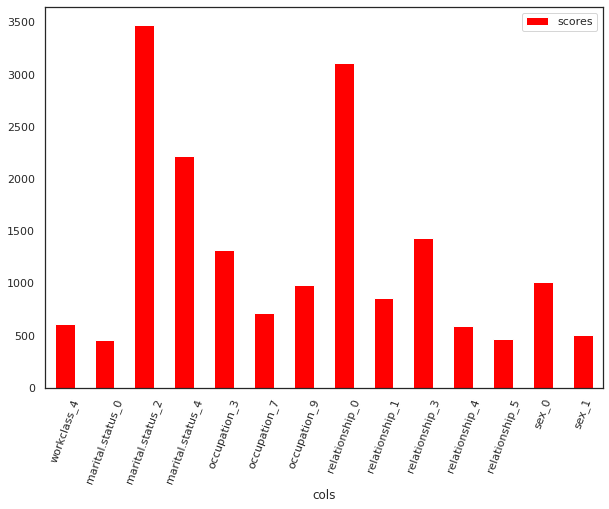

In [63]:
#Creating a dictionary and dataframe woith scores and col names
dict_temp = {'scores': fit.scores_, 'cols': names}
df_scores = pd.DataFrame(dict_temp)
print ("old shape :",df_scores.shape)
#Limiting the number of columns for next step by only picking scores higher than 100
df_scores = df_scores[df_scores.scores >= 450]
print ("New shape :",df_scores.shape)
# a bar plot 
df_scores.plot(kind='bar',x='cols',y='scores',color='red')
plt.xticks(rotation=70)
plt.show()


In [64]:
data_kaggle_ohe.columns.to_list()

['age',
 'fnlwgt',
 'education',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'income',
 'capital.flow',
 'workclass_0',
 'workclass_1',
 'workclass_2',
 'workclass_3',
 'workclass_4',
 'workclass_5',
 'workclass_6',
 'workclass_7',
 'workclass_8',
 'marital.status_0',
 'marital.status_1',
 'marital.status_2',
 'marital.status_3',
 'marital.status_4',
 'marital.status_5',
 'marital.status_6',
 'occupation_0',
 'occupation_1',
 'occupation_2',
 'occupation_3',
 'occupation_4',
 'occupation_5',
 'occupation_6',
 'occupation_7',
 'occupation_8',
 'occupation_9',
 'occupation_10',
 'occupation_11',
 'occupation_12',
 'occupation_13',
 'occupation_14',
 'relationship_0',
 'relationship_1',
 'relationship_2',
 'relationship_3',
 'relationship_4',
 'relationship_5',
 'race_0',
 'race_1',
 'race_2',
 'race_3',
 'race_4',
 'sex_0',
 'sex_1',
 'native.country_0',
 'native.country_1',
 'native.country_2',
 'native.country_3',
 'native.country_4',
 'native.country_5',
 '

In [65]:
#Getting the name of  variables in a list
#These variables were identified using ANOVA analysis of numeric variables above
list1 = ['age', 'capital.flow','hours.per.week'] 
#This is the list of newly created variables using SelectKBest and One Hot ENcoding
list2 = df_scores.cols.to_list() 
#List of variables present in our dataset
list3 = data_kaggle_ohe.columns.to_list()

#Getting all this together
list4 = ['income','education.num']
for items in list3:
    if items in list1:
        list4.append(items)
    if items in list2:
        list4.append(items)
#Final list of variables for running RFE and Logistic regression
print("Final list of variables for building my model :",list4)
#Filtering dataset accordingly
print("Shape of final dataset :",data_kaggle_ohe[list4].shape)
data_kaggle_ohe[list4].head(10)


Final list of variables for building my model : ['income', 'education.num', 'age', 'hours.per.week', 'capital.flow', 'workclass_4', 'marital.status_0', 'marital.status_2', 'marital.status_4', 'occupation_3', 'occupation_7', 'occupation_9', 'relationship_0', 'relationship_1', 'relationship_3', 'relationship_4', 'relationship_5', 'sex_0', 'sex_1']
Shape of final dataset : (32537, 19)


,income,education.num,age,hours.per.week,capital.flow,workclass_4,marital.status_0,marital.status_2,marital.status_4,occupation_3,occupation_7,occupation_9,relationship_0,relationship_1,relationship_3,relationship_4,relationship_5,sex_0,sex_1
0,1,9,90,40,-4356,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,9,82,18,-4356,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,1,10,66,40,-4356,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,4,54,40,-3900,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,1,10,41,40,-3900,0,0,0,0,0,0,1,0,0,1,0,0,1,0
5,1,9,34,45,-3770,0,1,0,0,0,1,0,0,0,0,1,0,1,0
6,1,6,38,40,-3770,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7,0,16,74,20,-3683,0,0,0,1,0,0,1,0,0,0,0,0,1,0
8,1,9,68,40,-3683,0,1,0,0,0,0,1,0,1,0,0,0,1,0
9,0,10,41,60,-3004,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [66]:
print(list4)
data_kaggle_ohe[list4[1:]] #.iloc[:,:]

['income', 'education.num', 'age', 'hours.per.week', 'capital.flow', 'workclass_4', 'marital.status_0', 'marital.status_2', 'marital.status_4', 'occupation_3', 'occupation_7', 'occupation_9', 'relationship_0', 'relationship_1', 'relationship_3', 'relationship_4', 'relationship_5', 'sex_0', 'sex_1']


,education.num,age,hours.per.week,capital.flow,workclass_4,marital.status_0,marital.status_2,marital.status_4,occupation_3,occupation_7,occupation_9,relationship_0,relationship_1,relationship_3,relationship_4,relationship_5,sex_0,sex_1
0,9,90,40,-4356,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,9,82,18,-4356,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,10,66,40,-4356,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,4,54,40,-3900,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,10,41,40,-3900,0,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,22,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
32557,12,27,38,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
32558,9,40,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
32559,9,58,40,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [67]:
#Creating Training(25,000)+Validation(15,000) and Test(10,000) sttartefied dataset - a split of 50-30-20% respectively
#First splitting dataset of 50,000 instances into training (80%) and test (20%)
from sklearn.model_selection import train_test_split
X_training, X_test, Y_training, Y_test = train_test_split(data_kaggle_ohe[list4[1:]], data_kaggle_ohe.income,
                                                    stratify=data_kaggle_ohe.income, 
                                                    test_size=0.10)


Y_training, Y_test =  Y_training.astype(int), Y_test.astype(int)
print("Shape of train split :",X_training.shape,Y_training.shape)
print("Shape of test split :",X_test.shape,Y_test.shape)

Shape of train split : (29283, 18) (29283,)
Shape of test split : (3254, 18) (3254,)


### **Using Logistic Regression**

In [68]:
X_training.columns.to_list() #18 variables

['education.num',
 'age',
 'hours.per.week',
 'capital.flow',
 'workclass_4',
 'marital.status_0',
 'marital.status_2',
 'marital.status_4',
 'occupation_3',
 'occupation_7',
 'occupation_9',
 'relationship_0',
 'relationship_1',
 'relationship_3',
 'relationship_4',
 'relationship_5',
 'sex_0',
 'sex_1']

In [69]:
# scikit-learn k-fold cross-validation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from itertools import compress
from numpy import array
from sklearn.model_selection import KFold, StratifiedKFold
from statistics import mode
from operator import itemgetter 
from sklearn.ensemble import GradientBoostingClassifier

# Prepare for 10-fold cross validation
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_training, Y_training)
accu_kfold_list = []
counter_kfold =0
# enumerate splits
for train, val in skf.split(X_training, Y_training):
    counter_kfold+=1
    #print("KFold validation iteration :",counter_kfold)
    X_train, X_val = X_training.iloc[train], X_training.iloc[val]
    Y_train, Y_val = Y_training.iloc[train], Y_training.iloc[val]


    # create a base classifier used to evaluate a subset of attributes
    accu_list = []
    for num_of_vars in range(1,len(X_training.columns)):
        
        #Logistic Regression
        logreg = LogisticRegression()
        # create the RFE model and select 3 attributes
        rfe = RFE(logreg, num_of_vars)
        rfe = rfe.fit(X_train, Y_train)

        # summarize the selection of the attributes
        #print("Number of variables used :",num_of_vars)
        col_list = X_training.columns.to_list()[:-1]
        #print(col_list)
        col_bool = rfe.support_
        #print(col_bool)
        col_list = list(compress(col_list, col_bool))  
        #print("Variables used in building this classifier :",col_list)

        # fit
        logreg.fit(X_train.filter(col_list), Y_train)

        # predict
        Y_pred = logreg.predict(X_val.filter(col_list))

        accuracy = accuracy_score(Y_val, Y_pred)
        #print('LogReg %s' % accuracy)

        #Adding the accuracy to list
        accu_list.append(accuracy)
 
    #print(accu_list)
    accu_kfold_list.append(accu_list)


#List of all accuracies
#print(accu_kfold_list)

#Creating empty lists to calculate which variable configuration produced maximum acccuracy
lst_rfe = []
lst_acu = []
for lst in accu_kfold_list:
    print("Index or number of variables used to build a model:",lst.index(max(lst))+1, "Max accuracy value :",max(lst) )
    lst_rfe.append(lst.index(max(lst))+1)
    lst_acu.append(max(lst))
    
print("List of 10 accuracies :",lst_acu)
print("List of indices or number of variables used :" ,lst_rfe)  
mode_val = max(set(lst_rfe), key=lst_rfe.count)
print("The Final number of variables that i am using to build and report best model :",mode_val)
indices = [i for i, x in enumerate(lst_rfe) if x == mode_val]
print("The indices of most occuring k value :",indices)

# using operator.itemgetter() to get elements from list  
res_list = list(itemgetter(*indices)(lst_acu))
print("The accuracy values present at these indices :",res_list)
print("The Final mean cross validation accuracy for reporting purpose is :",mean(res_list))
#print("The number of variables used in the best model :",mode(lst_avg))

Index or number of variables used to build a model: 16 Max accuracy value : 0.8238306589279618
Index or number of variables used to build a model: 17 Max accuracy value : 0.8378286104472517
Index or number of variables used to build a model: 14 Max accuracy value : 0.8204165244110618
Index or number of variables used to build a model: 17 Max accuracy value : 0.835724043715847
Index or number of variables used to build a model: 17 Max accuracy value : 0.8206967213114754
Index or number of variables used to build a model: 16 Max accuracy value : 0.8189890710382514
Index or number of variables used to build a model: 17 Max accuracy value : 0.8316256830601093
Index or number of variables used to build a model: 15 Max accuracy value : 0.8295765027322405
Index or number of variables used to build a model: 16 Max accuracy value : 0.8336748633879781
Index or number of variables used to build a model: 17 Max accuracy value : 0.8299180327868853
List of 10 accuracies : [0.8238306589279618, 0.8378

### Observations:
* First, I have **one hot encoded** the categorical variables here
* Using **SelectKBest** method from Scikit I have chosen the top scoring variables, i.e. 14 of them
* These variables along education.num, income and numeric columns (finalysed by ANOVA in earlier steps) are used to create the final dataset for our modeling purposes
* Now using **RFE**, i have identified the best model or the model with best estimate or highest accuracy
* Analysis of RFE output suggests that most stable and accuratly predicting model is build using 17 variables.
* The most interesting bit here is thi - the accuracy is higher than the former Logistic Classifier prediction. In the former classifier I used Label encoded or ordinally encoded variables for predictin purposes.
* My original hypotheses was that doing **Label encoding on categorical variables introduces ordinality** in the data, which is not the true picture and thus produces less accurate classifiers. The null hypothesis is rejected here it seems and as an outcome I can say that One hot encoding is the right thing to do when it comes to encoding categorical variables especially using Logistic regresion.

### XGBoost Classifier

In [70]:
# scikit-learn k-fold cross-validation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from itertools import compress
from numpy import array
from sklearn.model_selection import KFold, StratifiedKFold
from statistics import mode
from operator import itemgetter 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Prepare for 10-fold cross validation
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_training, Y_training)
accu_kfold_list = []
counter_kfold =0
# enumerate splits
for train, val in skf.split(X_training, Y_training):
    counter_kfold+=1
    #print("KFold validation iteration :",counter_kfold)
    X_train, X_val = X_training.iloc[train], X_training.iloc[val]
    Y_train, Y_val = Y_training.iloc[train], Y_training.iloc[val]


    # create a base classifier used to evaluate a subset of attributes
    accu_list = []
    for num_of_vars in range(1,len(X_training.columns)):
        
        # XG Boost Algorithm 
        XGB = XGBClassifier(learning_rate = 0.35, n_estimator = 200, silent = True, verbosity = 0)

        # create the RFE model 
        rfe = RFE(XGB, num_of_vars)
        rfe = rfe.fit(X_train, Y_train)

        
        # summarize the selection of the attributes
        #print("Number of variables used :",num_of_vars)
        col_list = X_training.columns.to_list()[:-1]
        #print(col_list)
        col_bool = rfe.support_
        #print(col_bool)
        col_list = list(compress(col_list, col_bool))  
        #print("Variables used in building this classifier :",col_list)

        # Training the model - Fitting
        model_xgb = XGB.fit(X_train.filter(col_list), Y_train)
        #model_random = R_forest.fit(X_train.filter(col_list), Y_train)
        
        # Predictions
        #pred_random = model_random.predict(X_val.filter(col_list))
        pred_xgb = model_xgb.predict(X_val.filter(col_list))

        #accuracy = accuracy_score(Y_val, pred_random)
        accuracy = accuracy_score(Y_val, pred_xgb)
        #print ("The accuracy of XGBoost model is : ",accuracy)

        #Adding the accuracy to list
        accu_list.append(accuracy)

    #print(accu_list)
    accu_kfold_list.append(accu_list)


#List of all accuracies
#print(accu_kfold_list)

#Creating empty lists to calculate which variable configuration produced maximum acccuracy
lst_rfe = []
lst_acu = []
for lst in accu_kfold_list:
    print("Index or number of variables used to build a model:",lst.index(max(lst))+1, "Max accuracy value :",max(lst) )
    lst_rfe.append(lst.index(max(lst))+1)
    lst_acu.append(max(lst))
    
print("List of 10 accuracies :",lst_acu)
print("List of indices or number of variables used :" ,lst_rfe)
mode_val = max(set(lst_rfe), key=lst_rfe.count)
print("The Final number of variables that i am using to build and report best model :",mode_val)
indices = [i for i, x in enumerate(lst_rfe) if x == mode_val]
print("The indices of most occuring k value :",indices)

# using operator.itemgetter() to get elements from list  
res_list = list(itemgetter(*indices)(lst_acu))
print("The accuracy values present at these indices :",res_list)
print("The Final mean cross validation accuracy for reporting purpose is :",mean(res_list))
#print("The number of variables used in the best model :",mode(lst_avg))

Index or number of variables used to build a model: 13 Max accuracy value : 0.8675315807442813
Index or number of variables used to build a model: 8 Max accuracy value : 0.8712871287128713
Index or number of variables used to build a model: 12 Max accuracy value : 0.8634346193240013
Index or number of variables used to build a model: 12 Max accuracy value : 0.875
Index or number of variables used to build a model: 8 Max accuracy value : 0.8620218579234973
Index or number of variables used to build a model: 16 Max accuracy value : 0.855191256830601
Index or number of variables used to build a model: 14 Max accuracy value : 0.8664617486338798
Index or number of variables used to build a model: 17 Max accuracy value : 0.8688524590163934
Index or number of variables used to build a model: 11 Max accuracy value : 0.8736338797814208
Index or number of variables used to build a model: 14 Max accuracy value : 0.8688524590163934
List of 10 accuracies : [0.8675315807442813, 0.8712871287128713, 0

### Observations:
* The Final number of variables that i am using to build and report best model : 11
* The Final mean cross validation accuracy for reporting purpose is : 86.99% or 87%
* This is the best performing model till now. 
* It is even better than the best Kaggle kernel accuracy or 86.75%. Plus, it is more robust reporting, ueto the usage of RFE and cross validation.